In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

def process_node(state: AgentState) -> AgentState:
    match state['operation']:
        case "+":
            ans = sum(state['values'])
        case "*":
            ans = math.prod(state['values'])
    
    state['result'] = f"Hi {state['name']}, your answer is: {ans}"
    return state

graph = StateGraph(AgentState)
graph.add_node("process_node", process_node)
graph.set_entry_point("process_node")
graph.set_finish_point("process_node")
app = graph.compile()

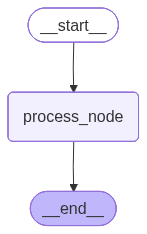

In [2]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [3]:
answers = app.invoke({"name": "Jack Sparrow", "values": [1, 2, 3, 4], "operation": "*"})

In [4]:
print(answers)

{'values': [1, 2, 3, 4], 'name': 'Jack Sparrow', 'operation': '*', 'result': 'Hi Jack Sparrow, your answer is: 24'}
